# Smucisca

## Projekt pri predmetu Programiranje 1

#### Zajeti podatki:

❄︎ datum in ura   
❄︎ ime smučišča  
❄︎ vreme  
❄︎ temperatura  
❄︎ količina snega (v cm)  
❄︎ odpiralni čas smučišča in zapiralni čas smučišča (v stolpcu obratovanje v obliki parov (odpiralni čas, zapiralni čas)   ter  v stolpcu odprto, ki pove koliko ur je bilo odprto smucisce)  
❄︎ delovanje gondol/sedežnic/vlečnic/parkov (v stolpcu sedeznice v obliki seznama in v stolpcu proge, ki pove koliko procentov vseh prog je bilo odprtih)

Podatki so bili zajeti na strani [snezni telefon](http://snezni-telefon.si) .

#### Predvidena analiza:

❄︎ kakšne so povezave temperature, količine snega, obratovalnim časom ter odprtostjo prog na posameznih smučiščih?  
❄︎ v katerem obdobju je bilo na Slovenskih smučiščih največ snega?  
❄︎ koliko je količina snega odvisna od temperature in vremena?  
❄︎ koliko je od količine snega/ temperature/ vremena odvisen obratovalni čas smučišča?  
❄︎ katero smučišče ima največji povprečen obratovalni čas? Katero smučišče 

### Analiza podatkov slovenskih smučišč je razdeljena na tri večje skope:

❄︎ analiza podatov po posameznih smučiščih  
❄︎ primerjava med smučišči  
❄︎ ostale primerjave (odvisnost količine snega od temperature, vremena, koliko sta temperatura in vreme povezana)

In [201]:
%matplotlib inline

import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') #naredi lepše grafe
plt.rcParams['figure.figsize'] = (15, 5)

Pripravi skupno datoteko:

In [345]:
Skupna=pd.read_csv('projekt-programiranje1/csv_datoteke/skupna.csv', parse_dates=['cas'],index_col='cas')

Pripravi datoteke po posameznih smuciscih:

In [346]:
Bukovnik = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/Bukovnik.csv',parse_dates=['cas'],index_col='cas')
CeljskaKoča = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/CeljskaKoča.csv',parse_dates=['cas'],index_col='cas')
GTCKope = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/GTCKope.csv',parse_dates=['cas'],index_col='cas')
Javornik = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/Javornik.csv',parse_dates=['cas'],index_col='cas')
MacesnovcRateče = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/MacesnovcRateče.csv',parse_dates=['cas'],index_col='cas')
MariborskoPohorje = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/MariborskoPohorje.csv',parse_dates=['cas'],index_col='cas')
Poseka = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/Poseka.csv',parse_dates=['cas'],index_col='cas')
RibnicanaPohorju = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/RibnicanaPohorju.csv',parse_dates=['cas'],index_col='cas')
Ribniškakoča = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/Ribniškakoča.csv',parse_dates=['cas'],index_col='cas')
Rogla = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/Rogla.csv',parse_dates=['cas'],index_col='cas')
RTCGolte = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/RTCGolte.csv',parse_dates=['cas'],index_col='cas')
RTCKranjskaGora = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/RTCKranjskaGora.csv',parse_dates=['cas'],index_col='cas')
RTCKrvavec = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/RTCKrvavec.csv',parse_dates=['cas'],index_col='cas')
SCCerkno = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/SCCerkno.csv',parse_dates=['cas'],index_col='cas')
ŠCRudno = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/ŠCRudno.csv',parse_dates=['cas'],index_col='cas')
Šentjošt = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/Šentjošt.csv',parse_dates=['cas'],index_col='cas')
SKIBorČrnivrh = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/SKIBorČrnivrh.csv',parse_dates=['cas'],index_col='cas')
Soriškaplanina = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/Soriškaplanina.csv',parse_dates=['cas'],index_col='cas')
STCStarivrh = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/STCStarivrh.csv',parse_dates=['cas'],index_col='cas')
StražaBled = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/StražaBled.csv',parse_dates=['cas'],index_col='cas')
TrijeKralji = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/TrijeKralji.csv',parse_dates=['cas'],index_col='cas')
ŽičniceVogel = pd.read_csv('projekt-programiranje1/csv_datoteke/posamezna_smucisca/ŽičniceVogel.csv',parse_dates=['cas'],index_col='cas')

# 1. Analiza po posameznih smučiščih

Na začetku bomo navedli dva primera slovenskih smučišč (enega bolj 'zanimivega' in enega malo manj).
Poskušali bomo najti kakšno povezavo med temperaturo, količino snega, obratovalnim časom in številom odprtih prog.

## 1.1. Bukovnik

V csv datoteki Bukovnik so shranjeni podatki o tem smučišču v obliki take tabele:

In [347]:
Bukovnik.head()

,smucisce,datum,vreme,temperatura,sneg,obratovanje,odprto,sedeznice,proge
cas,,,,,,,,,
2016-02-06 16:14:00,Bukovnik,2016-02-06,sončno,-3,40,"{('17.00', '21.00'), ('9.00', '13.00')}",8,{'vlečnica': '1/1'},100
2016-02-07 16:05:00,Bukovnik,2016-02-07,pretežno oblačno,0,40,"{('17.00', '21.00'), ('9.00', '13.00')}",8,{'vlečnica': '1/1'},100
2016-02-07 18:14:00,Bukovnik,2016-02-07,pretežno oblačno,0,40,"{('17.00', '21.00'), ('9.00', '13.00')}",8,{'vlečnica': '1/1'},100
2016-02-07 18:15:00,Bukovnik,2016-02-07,pretežno oblačno,0,40,"{('17.00', '21.00'), ('9.00', '13.00')}",8,{'vlečnica': '1/1'},100
2016-02-07 19:00:00,Bukovnik,2016-02-07,pretežno oblačno,0,40,"{('17.00', '21.00'), ('9.00', '13.00')}",8,{'vlečnica': '1/1'},100


Primer ene ure:

In [348]:
Bukovnik.iloc[0]

smucisce                                      Bukovnik
datum                                       2016-02-06
vreme                                           sončno
temperatura                                         -3
sneg                                                40
obratovanje    {('17.00', '21.00'), ('9.00', '13.00')}
odprto                                               8
sedeznice                          {'vlečnica': '1/1'}
proge                                              100
Name: 2016-02-06 16:14:00, dtype: object

### 1.1.1. povprečne vrednosti po dnevih

In [349]:
Bukovnik.groupby('datum').mean().head()

,temperatura,sneg,odprto,proge
datum,,,,
2016-02-06,-3,40,8,100
2016-02-07,0,40,8,100
2016-02-08,5,30,4,0
2016-02-11,-2,30,4,100
2016-02-12,-2,30,4,100


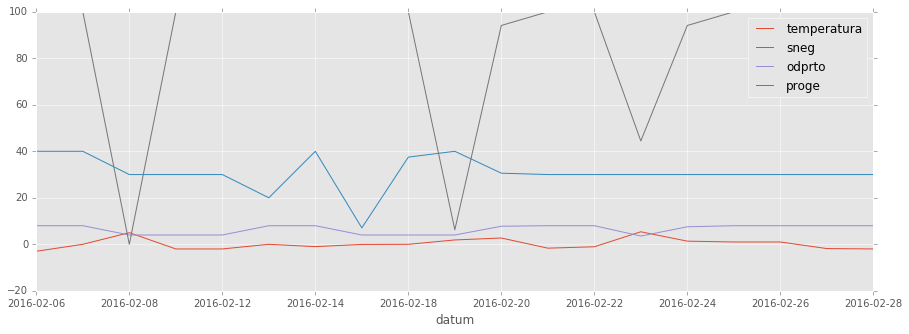

In [350]:
Bukovnik.groupby('datum').mean().plot()

### 1.1.2. tempretatura

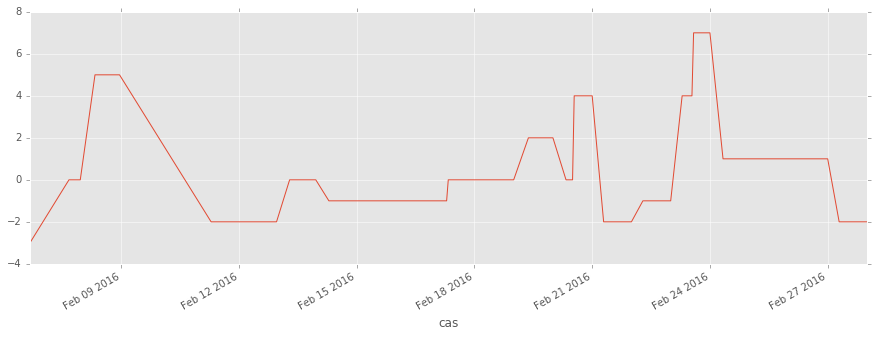

In [351]:
Bukovnik['temperatura'].plot()

maksimalna temperatura v opazovalnem obdobju:

In [352]:
Bukovnik['temperatura'].max()

7

minimalna temperatura v opazovalnem obdobju:

In [353]:
Bukovnik['temperatura'].min()

-3

### 1.1.3. količina snega (v cm)

maksimalna količina snega v opazovalnem obdobju:

In [355]:
Bukovnik['sneg'].max()

40

minimalna količina snega v opazovalnem obdobju:

In [356]:
Bukovnik['sneg'].min()

5

### 1.1.4. obratovalni čas smučišča v urah 

maksimalen obratovalni čas v opazovalnem obdobju:

In [358]:
Bukovnik['odprto'].max()

8.0

minimalen obratovalni čas v opazovalnem obdobju:

In [359]:
Bukovnik['odprto'].min()

0.0

### 1.1.5.  Primerjava

In [360]:
Bukovnik[['temperatura', 'sneg', 'odprto', 'proge']].head(10)

,temperatura,sneg,odprto,proge
cas,,,,
2016-02-06 16:14:00,-3,40,8,100
2016-02-07 16:05:00,0,40,8,100
2016-02-07 18:14:00,0,40,8,100
2016-02-07 18:15:00,0,40,8,100
2016-02-07 19:00:00,0,40,8,100
2016-02-07 20:00:00,0,40,8,100
2016-02-07 21:00:00,0,40,8,100
2016-02-07 22:00:00,0,40,8,100
2016-02-07 23:00:00,0,40,8,100


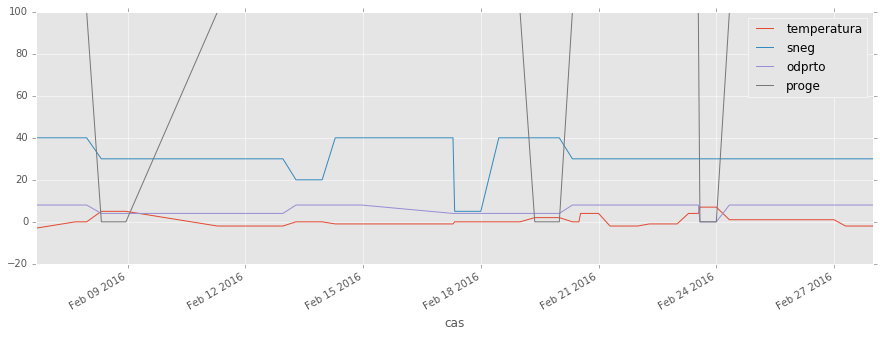

In [361]:
Bukovnik[['temperatura', 'sneg', 'odprto', 'proge']].plot()

Iz tega primera je težko sklepati na kakršnokoli povezavo med temperaturo, količino snega, obratovalnim časom ter odprtostjo prog. Poskusimo še z Mariborskim Pohorjem.

## 1.2. Mariborsko Pohorje 

Že iz tabele je razvidno, da so se razmere na Mariborskem Pohurju bolj spreminjale kot na smučišču Bukovnik (različna dolžina dolžina obratovalnega časa, različno število odprtih prog), zato je to Smučišče bolj zanimivo za analizo.

In [362]:
MariborskoPohorje

,smucisce,datum,vreme,temperatura,sneg,obratovanje,odprto,sedeznice,proge
cas,,,,,,,,,
2016-02-06 16:14:00,MariborskoPohorje,2016-02-06,sončno,1,55,"{('9.00', '16.00'), ('18.00', '21.00')}",10,"{'sedeznica': '4/5', 'vlečnica': '4/9', 'gondo...",60.00
2016-02-07 16:05:00,MariborskoPohorje,2016-02-07,sončno,3,55,"{('9.00', '16.00'), ('18.00', '21.00')}",10,"{'sedeznica': '3/5', 'vlečnica': '4/9', 'gondo...",53.33
2016-02-07 18:14:00,MariborskoPohorje,2016-02-07,sončno,3,55,"{('9.00', '16.00'), ('18.00', '21.00')}",10,"{'sedeznica': '3/5', 'vlečnica': '4/9', 'gondo...",53.33
2016-02-07 18:15:00,MariborskoPohorje,2016-02-07,sončno,3,55,"{('9.00', '16.00'), ('18.00', '21.00')}",10,"{'sedeznica': '3/5', 'vlečnica': '4/9', 'gondo...",53.33
2016-02-07 19:00:00,MariborskoPohorje,2016-02-07,sončno,3,55,"{('9.00', '16.00'), ('18.00', '21.00')}",10,"{'sedeznica': '3/5', 'vlečnica': '4/9', 'gondo...",53.33
2016-02-07 20:00:00,MariborskoPohorje,2016-02-07,sončno,3,55,"{('9.00', '16.00'), ('18.00', '21.00')}",10,"{'sedeznica': '3/5', 'vlečnica': '4/9', 'gondo...",53.33
2016-02-07 21:00:00,MariborskoPohorje,2016-02-07,sončno,3,55,"{('9.00', '16.00'), ('18.00', '21.00')}",10,"{'sedeznica': '3/5', 'vlečnica': '4/9', 'gondo...",53.33
2016-02-07 22:00:00,MariborskoPohorje,2016-02-07,sončno,3,55,"{('9.00', '16.00'), ('18.00', '21.00')}",10,"{'sedeznica': '3/5', 'vlečnica': '4/9', 'gondo...",53.33
2016-02-07 23:00:00,MariborskoPohorje,2016-02-07,sončno,3,55,"{('9.00', '16.00'), ('18.00', '21.00')}",10,"{'sedeznica': '3/5', 'vlečnica': '4/9', 'gondo...",53.33


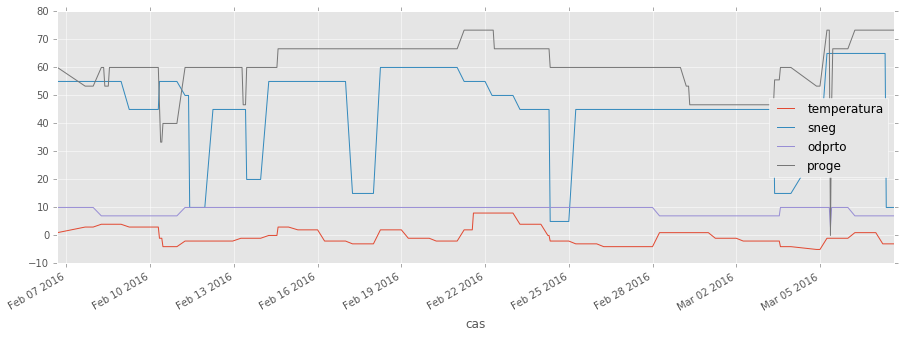

In [364]:
MariborskoPohorje[['temperatura','sneg','odprto','proge']].plot()

primer ene ure:

In [365]:
MariborskoPohorje.iloc[9]

smucisce                                       MariborskoPohorje
datum                                                 2016-02-08
vreme                                                     sončno
temperatura                                                    4
sneg                                                          55
obratovanje                                  {('9.00', '16.00')}
odprto                                                         7
sedeznice      {'sedeznica': '4/5', 'vlečnica': '4/9', 'gondo...
proge                                                         60
Name: 2016-02-08 06:00:00, dtype: object

### 1.2.1. povprečne vrednosti po dnevih

In [366]:
MariborskoPohorje.groupby('datum').mean().head()

,temperatura,sneg,odprto,proge
datum,,,,
2016-02-06,1.000000,55.000000,10,60.000000
2016-02-07,3.000000,55.000000,10,53.330000
2016-02-08,4.000000,55.000000,7,58.517778
2016-02-09,3.000000,45.000000,7,60.000000
2016-02-10,-2.722222,53.888889,7,41.851667


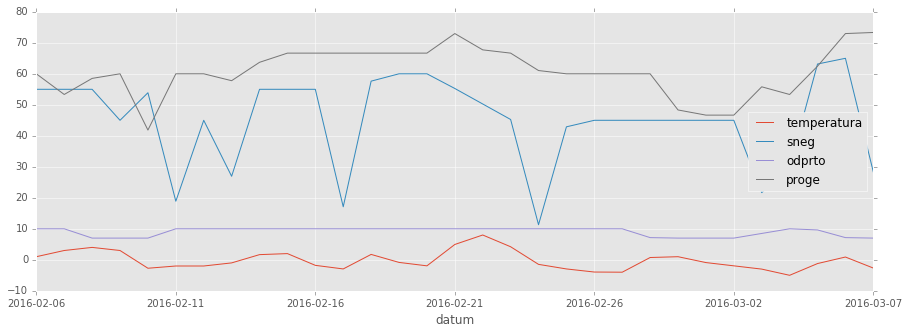

In [367]:
MariborskoPohorje.groupby('datum').mean().plot()

V tem primeru že lahko sklepamo na manjšo povezavo med temperaturo in odprtimi progami (mogoče tudi s količino snega)

### 1.2.2. tempretatura

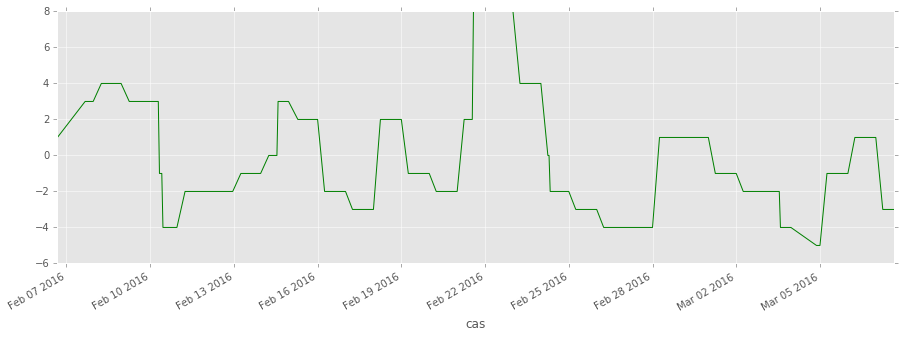

In [368]:
MariborskoPohorje['temperatura'].plot(color='green')

Minimalna in maksimalna temperatura v opazovalnem obdobju:

In [369]:
MariborskoPohorje['temperatura'].min()

-5

In [370]:
MariborskoPohorje['temperatura'].max()

8

### 1.2.3. količina snega (v cm)

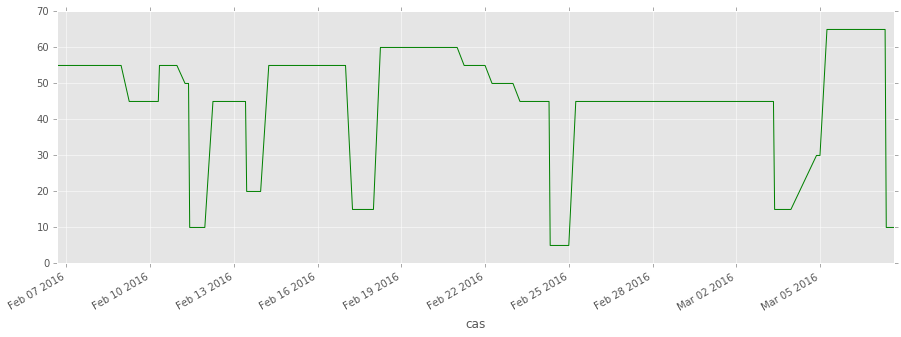

In [371]:
MariborskoPohorje['sneg'].plot(color='green')

In [372]:
MariborskoPohorje['sneg'].min()

5

In [373]:
MariborskoPohorje['sneg'].max()

65

### 1.2.4. obratovalni čas smučišča v urah 

In [375]:
MariborskoPohorje['odprto'].max()

10.0

In [376]:
MariborskoPohorje['odprto'].min()

3.0

### 1.2.5. število odprtih prog (v procentih)

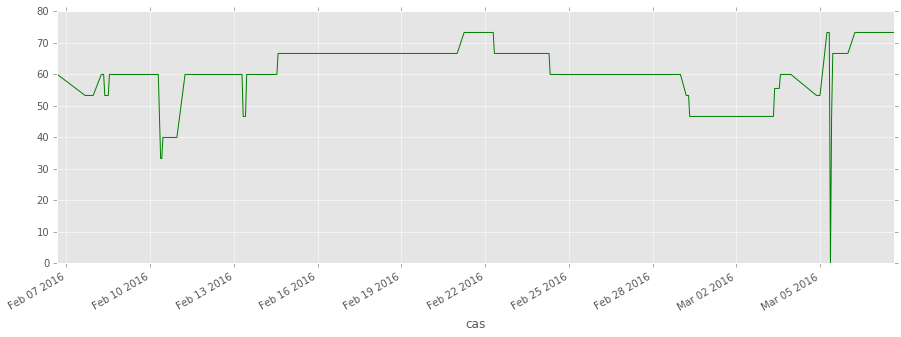

In [377]:
MariborskoPohorje['proge'].plot(color='green')

In [378]:
MariborskoPohorje['proge'].min()

0.0

In [379]:
MariborskoPohorje['proge'].max()

73.329999999999998

Podobno analizo bi lahko naredili tudi za ostala smučišča, vendar zaradi bolše preglednosti to izpustimo.

# 2. Primerjava med smučišči 

V ta namen smo pripravili datoteko Skupna.csv

In [380]:
Skupna

,smucisce,datum,vreme,temperatura,sneg,obratovanje,odprto,sedeznice,proge
cas,,,,,,,,,
2016-02-06 16:14:00,RTCKrvavec,2016-02-06,sončno,0,55,"{('8.00', '16.00')}",8.0,"{'sedeznica': '7/7', 'vlečnica': '3/5', 'gondo...",84.62
2016-02-06 16:14:00,MariborskoPohorje,2016-02-06,sončno,1,55,"{('9.00', '16.00'), ('18.00', '21.00')}",10.0,"{'sedeznica': '4/5', 'vlečnica': '4/9', 'gondo...",60.00
2016-02-06 16:14:00,Rogla,2016-02-06,sončno,0,55,"{('17.00', '21.00'), ('9.00', '16.00')}",11.0,"{'sedeznica': '2/2', 'vlečnica': '9/10'}",91.67
2016-02-06 16:14:00,RTCKranjskaGora,2016-02-06,sončno,1,40,"{('19.00', '22.00'), ('9.00', '16.00')}",10.0,"{'park': '1/2', 'vlečnica': '8/13', 'sedeznica...",65.00
2016-02-06 16:14:00,SCCerkno,2016-02-06,sončno,-2,55,"{('9.00', '16.00')}",7.0,"{'sedeznica': '4/5', 'vlečnica': '2/2'}",85.71
2016-02-06 16:14:00,ŽičniceVogel,2016-02-06,sončno,0,50,"{('8.00', '16.00')}",8.0,"{'sedeznica': '2/4', 'vlečnica': '2/4', 'gondo...",55.56
2016-02-06 16:14:00,Soriškaplanina,2016-02-06,sončno,0,25,"{('9.00', '16.00')}",7.0,{'vlečnica': '2/4'},50.00
2016-02-06 16:14:00,GTCKope,2016-02-06,pretežno jasno,3,45,"{('9.00', '16.00'), ('18.00', '22.00')}",11.0,"{'sedeznica': '2/2', 'vlečnica': '5/6'}",87.50
2016-02-06 16:14:00,RTCGolte,2016-02-06,sončno,0,40,"{('9.00', '16.00')}",7.0,"{'sedeznica': '3/3', 'vlečnica': '2/3', 'gondo...",85.71


## 2.1. Povprečne vrednosti

Povprečne vrednosti temperature, količine snega, obratovalnega časa (odprto), procenta odprtih prog (proge)

In [381]:
PoSmuciscih=Skupna.groupby('smucisce').mean()

In [382]:
PoSmuciscih

,temperatura,sneg,odprto,proge
smucisce,,,,
Bukovnik,0.482394,29.911972,6.295775,84.859155
Celjskakoča,2.119675,20.141988,3.728195,26.640588
GTCKope,-0.438795,48.487759,9.105461,84.745800
Javornik,-0.404255,18.851064,4.314894,26.595745
MacesnovcRateče,-0.352542,32.847458,5.010169,50.171356
MariborskoPohorje,-0.132576,45.255682,9.026515,60.994337
Poseka,1.171694,25.802784,1.512761,19.025522
RTCGolte,-0.830769,73.615385,7.000000,91.674481
RTCKranjskaGora,1.140115,45.719770,9.712092,75.567255


### 2.1.1. Temperatura

Zanimalo nas je tudi katero smučišče je povprečno 'najbolj mrzlo' in katero 'najbolj toplo'.

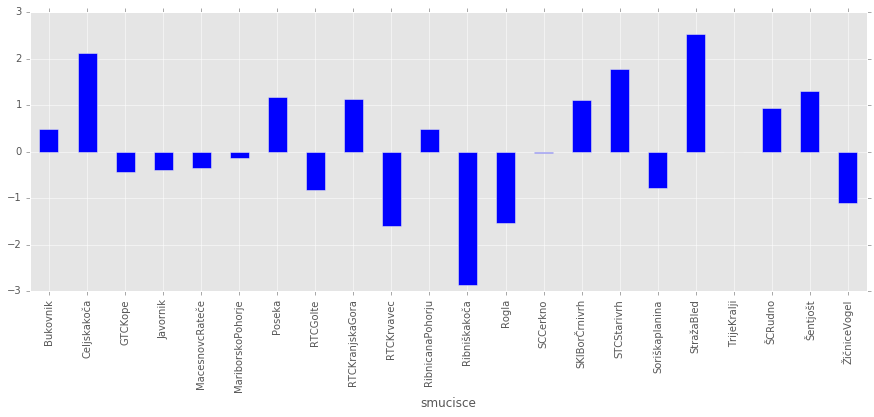

In [383]:
PoSmuciscih['temperatura'].plot(kind='bar')

Opazimo, da iz povprečja zelo izstopa Ribniška Koča, ki je torej imelo najnižjo povprečno temperaturo.
Najvišjo povprečno temperaturo pa je imelo smučišče Straža Bled.

Analizirai bomo tudi kakšna je temperaturna razlika med posameznimi smučišči.
Najprej si poglejmo temperaturno razliko med Roglo in Mariborskim Pohorjem. Razberemo lahko, da se temperature v merjenem času niso preveč razlikovale. Podobnos nas ne preseneča, saj sta omenjeni smučišči razmeroma blizu.

In [384]:
Primerjava=pd.merge(MariborskoPohorje.reset_index(), Rogla.reset_index(),on=['cas','datum'],suffixes=('_MariborskoPohorje','_Rogla'))

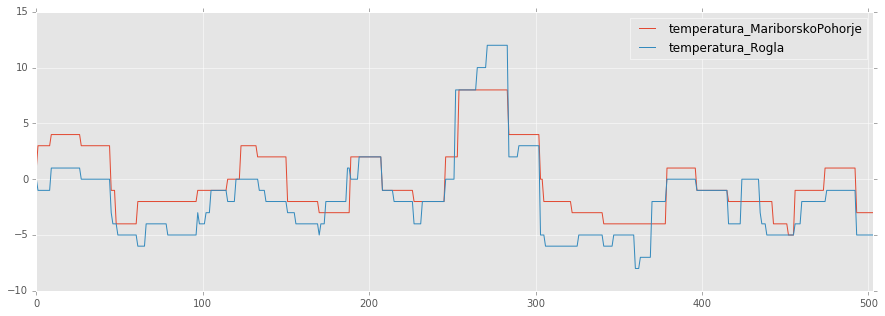

In [385]:
Primerjava[['cas','temperatura_MariborskoPohorje','temperatura_Rogla']].plot()

Temperaturno razliko pa že opazimo med smučiščema Mariborsko Pohorje in RTC Kranjska Gora, ki ležina na povsem drugih koncih Slovenije.

In [386]:
Primerjava1=pd.merge(MariborskoPohorje.reset_index(), RTCKranjskaGora.reset_index(),on=['cas','datum'],suffixes=('_MariborskoPohorje','_RTCKranjskaGora'))

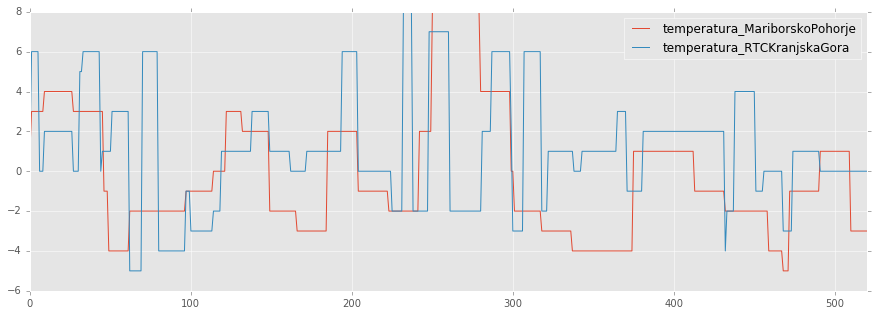

In [387]:
Primerjava1[['cas','temperatura_MariborskoPohorje','temperatura_RTCKranjskaGora']].plot()

### 2.1.2. Količina snega

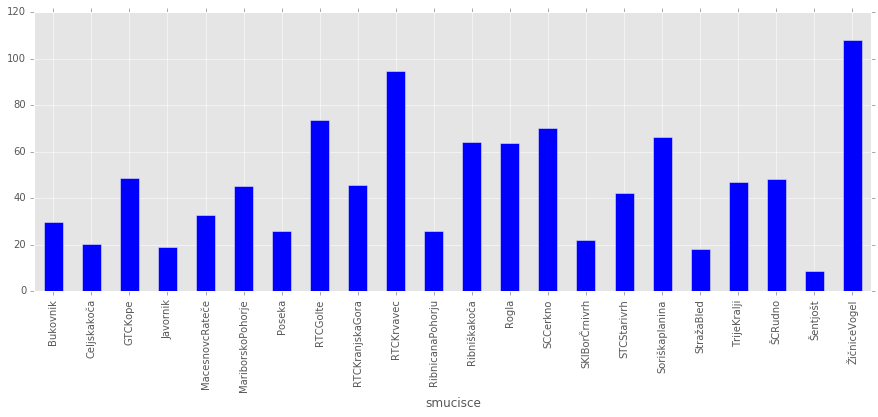

In [388]:
PoSmuciscih['sneg'].plot(kind='bar')

## 2.2. Minimalne in Maksimalne vrednosti
### Koliko in kje
### 2.2.1. Temperatura

Kje je bila dosežena najnižje temperatura v tem obdobju? Koliko je bilo pri tej temperaturi sneg in kakšno je bilo vreme?  

In [389]:
Skupna['temperatura'].min()

-8

In [390]:
Skupna['temperatura'].max()

12

### 2.2.2. Količina snega

In [391]:
Skupna[['sneg','temperatura','smucisce','vreme']].min()

sneg                     0
temperatura             -8
smucisce          Bukovnik
vreme          delno jasno
dtype: object

In [392]:
Skupna[['sneg','temperatura','smucisce','vreme']].max()

sneg                                            330
temperatura                                      12
smucisce                               ŽičniceVogel
vreme          visoka oblačnost, zg. sneg - sp. dež
dtype: object

# 3. Ostale analize